In [112]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [125]:
airbnbListings = pd.read_csv('seattle/listings.csv')
airbnbListings.head()

id                           listing_url     scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  2.020000e+13       4/1/16   
1   953595   https://www.airbnb.com/rooms/953595  2.020000e+13       4/1/16   
2  3308979  https://www.airbnb.com/rooms/3308979  2.020000e+13       4/1/16   
3  7421966  https://www.airbnb.com/rooms/7421966  2.020000e+13       4/1/16   
4   278830   https://www.airbnb.com/rooms/278830  2.020000e+13       4/1/16   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [ ]:
# Drop useless columns

In [114]:
airbnbRooms = pd.DataFrame(airbnbListings[['bathrooms', 'bedrooms', 'accommodates', 'beds']])
airbnbSuperHost = pd.DataFrame(airbnbListings['host_is_superhost'])

print(airbnbRooms.info())
print()
print(airbnbSuperHost.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
bathrooms       3802 non-null float64
bedrooms        3812 non-null float64
accommodates    3818 non-null int64
beds            3817 non-null float64
dtypes: float64(3), int64(1)
memory usage: 119.4 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 1 columns):
host_is_superhost    3816 non-null object
dtypes: object(1)
memory usage: 30.0+ KB
None


In [115]:
# Check missing values in data
airbnbRooms.isnull().sum()

bathrooms       16
bedrooms         6
accommodates     0
beds             1
dtype: int64

In [116]:
# Fill missing values in data
airbnbRooms['bathrooms'].fillna(value = 0, inplace = True)
airbnbRooms['bedrooms'].fillna(value = 0, inplace = True)
airbnbRooms['beds'].fillna(value = 0, inplace = True)
airbnbSuperHost.fillna(value = "f", inplace = True)

In [117]:
airbnbRooms['bedrooms'] = airbnbRooms['bedrooms'].astype('int64')
airbnbRooms['beds'] = airbnbRooms['bedrooms'].astype('int64')
airbnbSuperHost = airbnbSuperHost.astype('category')

print(airbnbRooms.info())
print()
print(airbnbSuperHost.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 4 columns):
bathrooms       3818 non-null float64
bedrooms        3818 non-null int64
accommodates    3818 non-null int64
beds            3818 non-null int64
dtypes: float64(1), int64(3)
memory usage: 119.4 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 1 columns):
host_is_superhost    3818 non-null category
dtypes: category(1)
memory usage: 3.9 KB
None


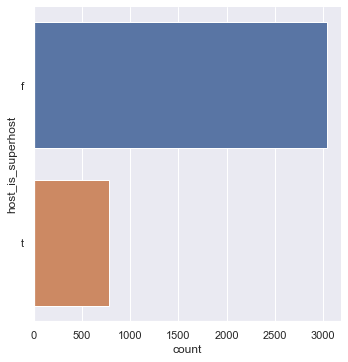

In [118]:
sb.catplot(y = "host_is_superhost", data = airbnb_listings, kind = "count")

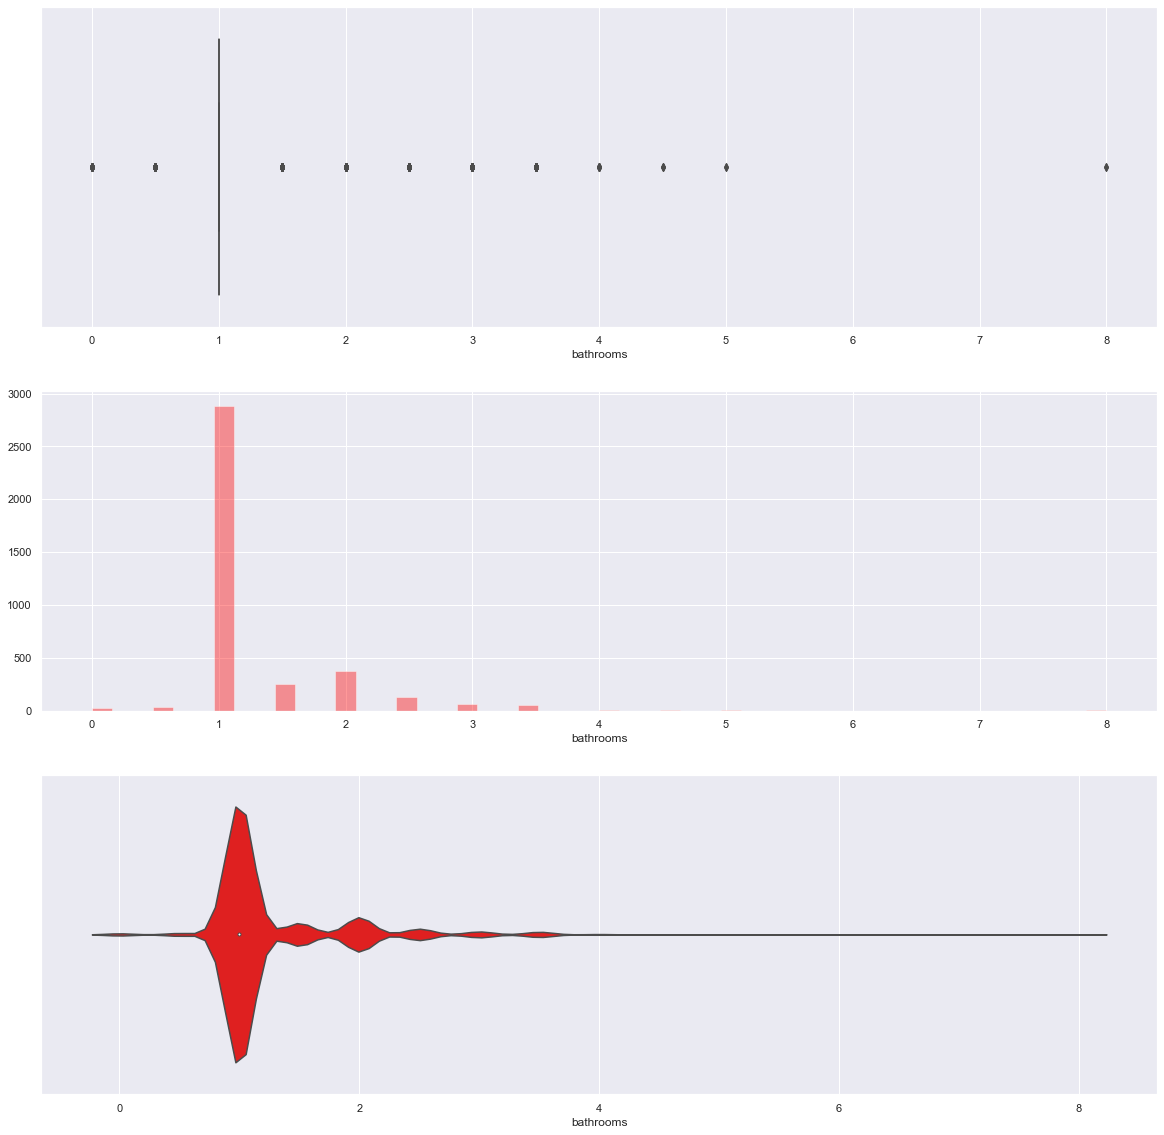

In [119]:
# Plot the distributions of Data
f, axes = plt.subplots(3, 1, figsize=(20, 20))

sb.boxplot(airbnbRooms['bathrooms'], orient = "h", ax = axes[0], color = "red")
sb.distplot(airbnbRooms['bathrooms'], kde = False, ax = axes[1], color = "red")
sb.violinplot(airbnbRooms['bathrooms'], ax = axes[2], color = "red")

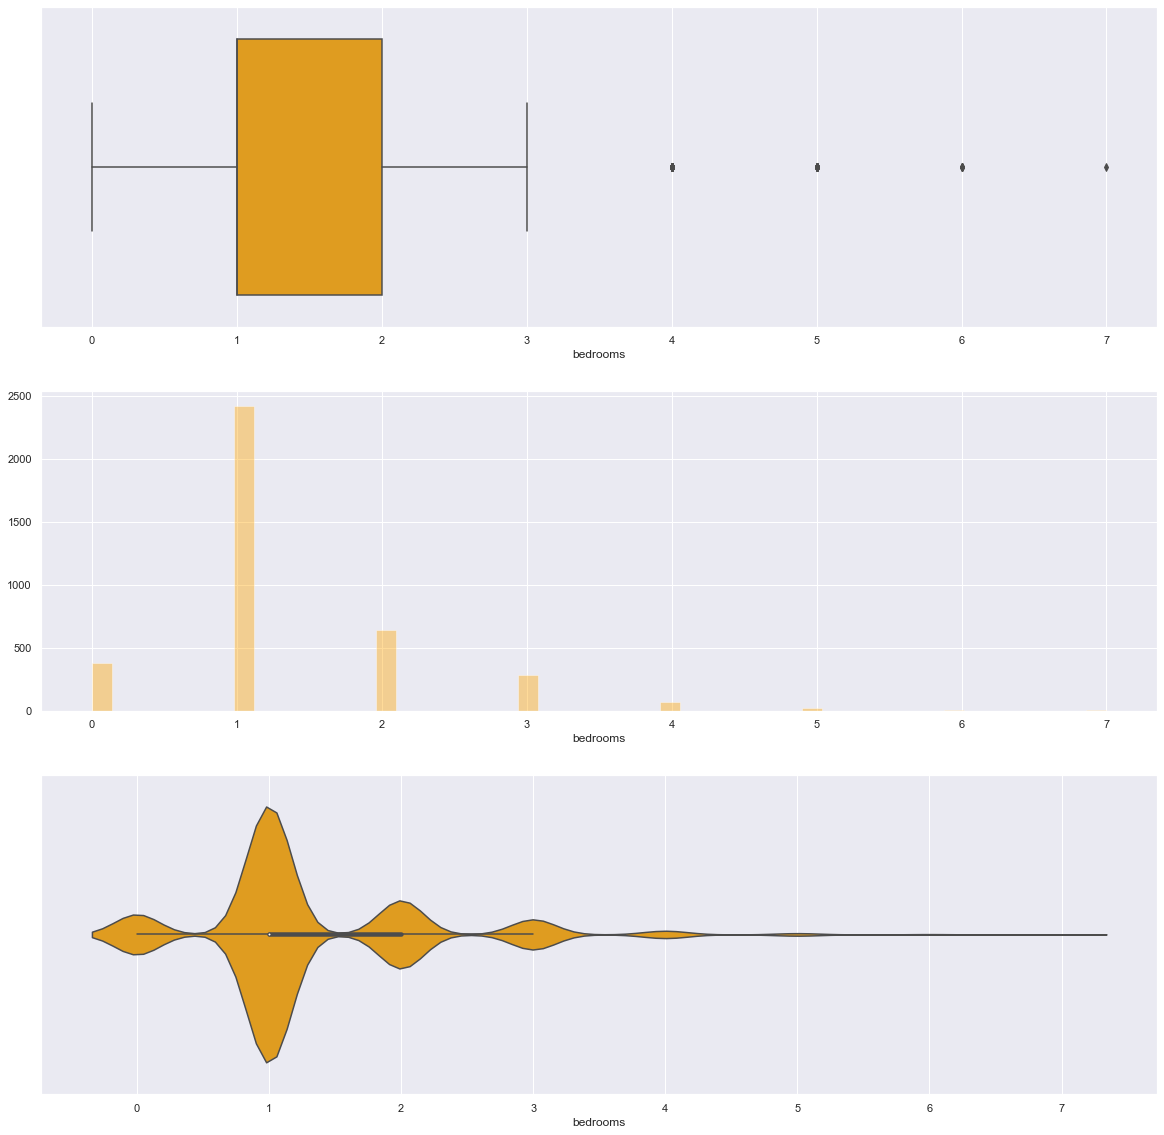

In [120]:
f, axes = plt.subplots(3, 1, figsize=(20, 20))

sb.boxplot(airbnbRooms['bedrooms'], orient = "h", ax = axes[0], color = "orange")
sb.distplot(airbnbRooms['bedrooms'], kde = False, ax = axes[1], color = "orange")
sb.violinplot(airbnbRooms['bedrooms'], ax = axes[2], color = "orange")

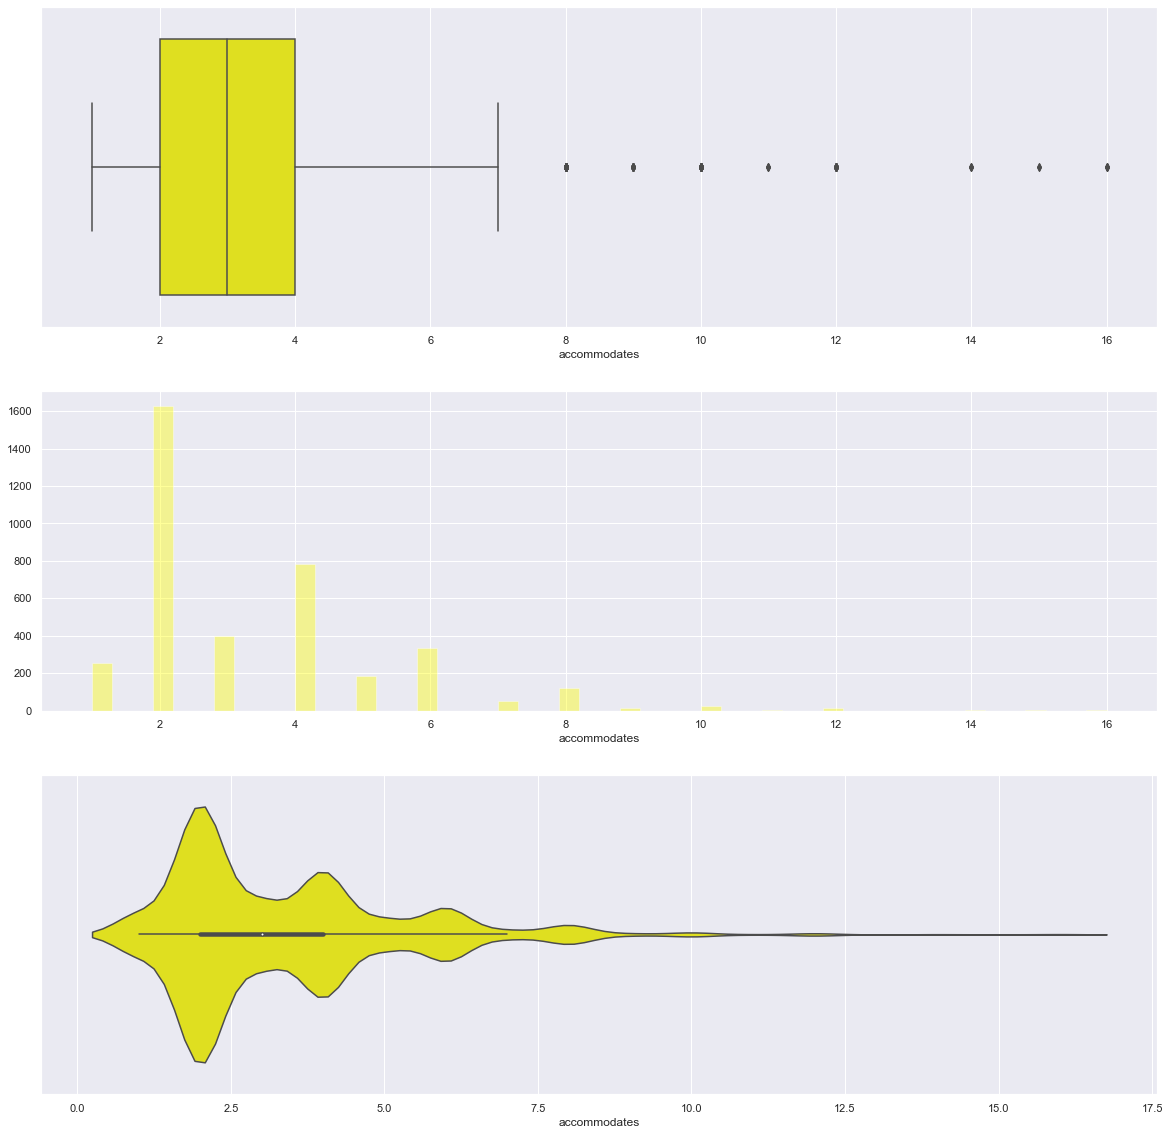

In [121]:
# Plot the distributions of Data
f, axes = plt.subplots(3, 1, figsize=(20, 20))

sb.boxplot(airbnbRooms['accommodates'], orient = "h", ax = axes[0], color = "yellow")
sb.distplot(airbnbRooms['accommodates'], kde = False, ax = axes[1], color = "yellow")
sb.violinplot(airbnbRooms['accommodates'], ax = axes[2], color = "yellow")

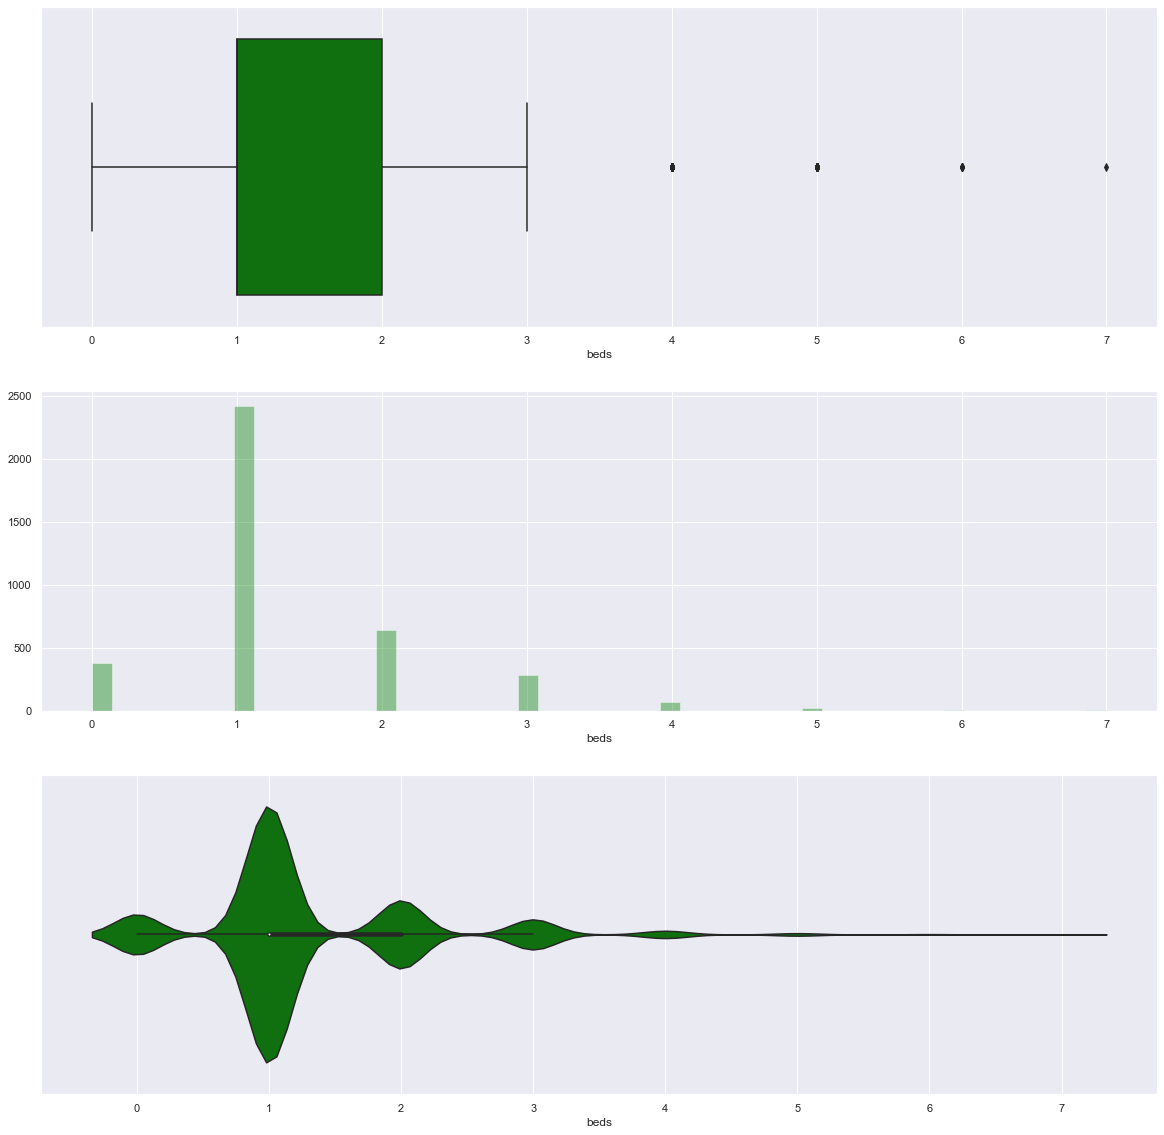

In [122]:
# Plot the distributions of Data
f, axes = plt.subplots(3, 1, figsize=(20, 20))

sb.boxplot(airbnbRooms['beds'], orient = "h", ax = axes[0], color = "green")
sb.distplot(airbnbRooms['beds'], kde = False, ax = axes[1], color = "green")
sb.violinplot(airbnbRooms['beds'], ax = axes[2], color = "green")

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7974152986377925

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7947643979057591

Confusion Matrix of Train Data:
[[2276    3]
 [ 577    7]]

True Positive Rate of Train DataSet: 0.0120
True Negative Rate of Train DataSet: 0.9987
False Positive Rate of Train DataSet: 0.0013
False Negative Rate of Train DataSet: 0.9880

Confusion Matrix of Test Data:
[[758   3]
 [193   1]]

True Positive Rate of Train DataSet: 0.0052
True Negative Rate of Train DataSet: 0.9961
False Positive Rate of Train DataSet: 0.0039
False Negative Rate of Train DataSet: 0.9948



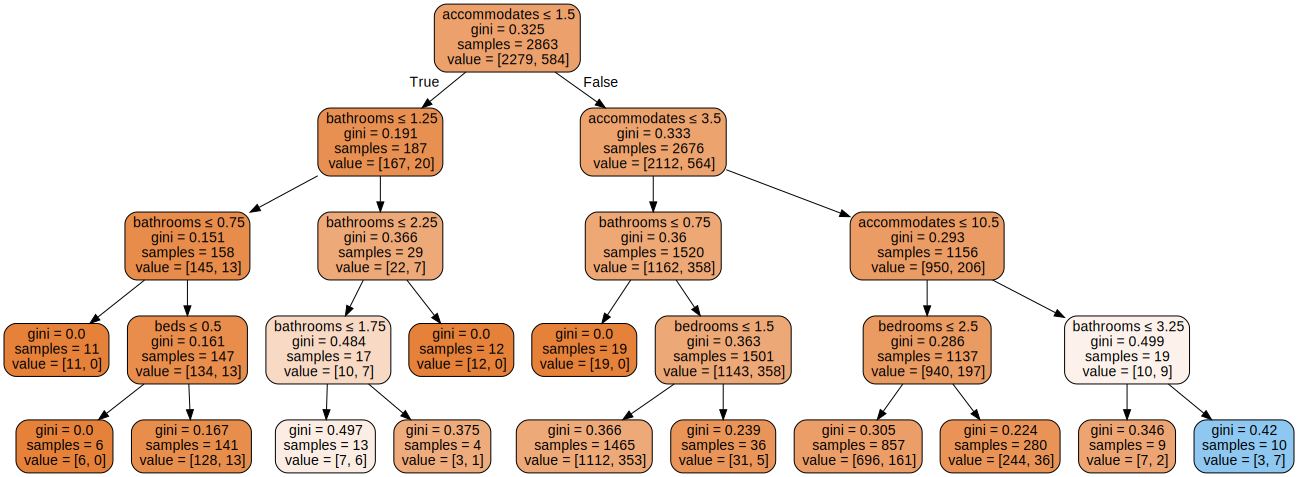

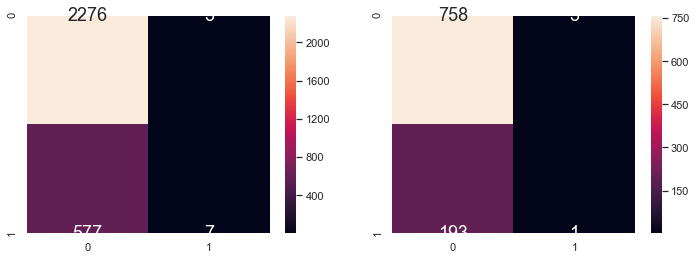

In [123]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


# Split the CentralAir-SalePrice Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(airbnbRooms, airbnbSuperHost, test_size = 954.5/3818.0)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict CentralAir values corresponding to SalePrice
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Train Data Rates
print("Confusion Matrix of Train Data:")
print(confusion_matrix(y_train, y_train_pred))

TN = confusion_matrix(y_train, y_train_pred)[0][0]
FP = confusion_matrix(y_train, y_train_pred)[0][1]
FN = confusion_matrix(y_train, y_train_pred)[1][0]
TP = confusion_matrix(y_train, y_train_pred)[1][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(TN+FP)
FNR = FN/(TP+FN)
print()

print("True Positive Rate of Train DataSet: {0:.4f}".format(TPR))
print("True Negative Rate of Train DataSet: {0:.4f}".format(TNR))
print("False Positive Rate of Train DataSet: {0:.4f}".format(FPR))
print("False Negative Rate of Train DataSet: {0:.4f}".format(FNR))
print()

# Test Data Rates
print("Confusion Matrix of Test Data:")
print(confusion_matrix(y_test, y_test_pred))

TN = confusion_matrix(y_test, y_test_pred)[0][0]
FP = confusion_matrix(y_test, y_test_pred)[0][1]
FN = confusion_matrix(y_test, y_test_pred)[1][0]
TP = confusion_matrix(y_test, y_test_pred)[1][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(TN+FP)
FNR = FN/(TP+FN)
print()

print("True Positive Rate of Train DataSet: {0:.4f}".format(TPR))
print("True Negative Rate of Train DataSet: {0:.4f}".format(TNR))
print("False Positive Rate of Train DataSet: {0:.4f}".format(FPR))
print("False Negative Rate of Train DataSet: {0:.4f}".format(FNR))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)